In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
transform = transforms.Compose([
    transforms.ToTensor(),  # [0,1]
])

mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
dataloader = DataLoader(mnist, batch_size=64, shuffle=True)


## 1. GAN

In [5]:
class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 28*28),
            nn.Tanh()  # Output range [-1, 1]
        )

    def forward(self, z):
        out = self.model(z)
        return out.view(z.size(0), 1, 28, 28)

class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Probability of real
        )

    def forward(self, img):
        return self.model(img)


In [6]:
z_dim = 100
lr = 0.0002
beta1 = 0.5

G = Generator(z_dim).to(device)
D = Discriminator().to(device)

criterion = nn.BCELoss()
opt_G = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
opt_D = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))


In [7]:
def show_generated(generator, epoch, n=16):
    generator.eval()
    with torch.no_grad():
        z = torch.randn(n, z_dim).to(device)
        gen_imgs = generator(z).cpu()
    generator.train()
    
    grid = gen_imgs.view(n, 28, 28)
    fig, axs = plt.subplots(1, n, figsize=(n, 1))
    for i in range(n):
        axs[i].imshow(grid[i], cmap='gray')
        axs[i].axis('off')
    plt.suptitle(f"Epoch {epoch}")
    plt.show()


Epoch [1/50]  D Loss: 0.7154  G Loss: 2.4353
Epoch [2/50]  D Loss: 0.8726  G Loss: 2.7276
Epoch [3/50]  D Loss: 0.5075  G Loss: 2.6883
Epoch [4/50]  D Loss: 0.5344  G Loss: 3.1015
Epoch [5/50]  D Loss: 0.8259  G Loss: 1.3178
Epoch [6/50]  D Loss: 0.5395  G Loss: 2.2730
Epoch [7/50]  D Loss: 0.9060  G Loss: 2.7538
Epoch [8/50]  D Loss: 0.6162  G Loss: 2.0632
Epoch [9/50]  D Loss: 0.6192  G Loss: 1.8860
Epoch [10/50]  D Loss: 0.6186  G Loss: 1.3401


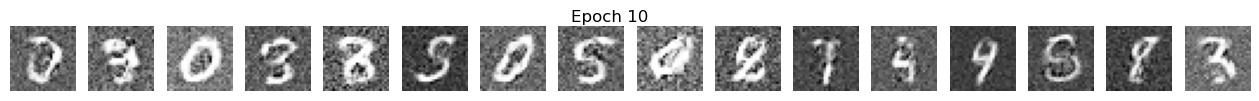

Epoch [11/50]  D Loss: 0.6323  G Loss: 2.2254
Epoch [12/50]  D Loss: 0.7094  G Loss: 2.0825
Epoch [13/50]  D Loss: 0.7625  G Loss: 1.9734
Epoch [14/50]  D Loss: 0.7079  G Loss: 2.0640
Epoch [15/50]  D Loss: 0.7917  G Loss: 1.7207
Epoch [16/50]  D Loss: 0.6166  G Loss: 1.4119
Epoch [17/50]  D Loss: 0.7502  G Loss: 1.9247
Epoch [18/50]  D Loss: 0.6136  G Loss: 2.1270
Epoch [19/50]  D Loss: 0.8066  G Loss: 1.7583
Epoch [20/50]  D Loss: 0.6572  G Loss: 2.8775


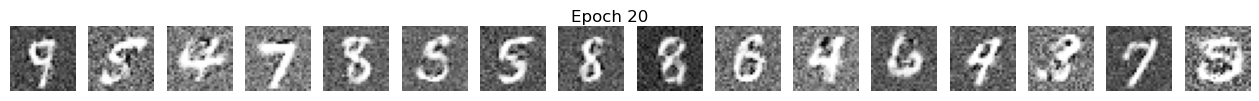

Epoch [21/50]  D Loss: 0.5016  G Loss: 1.8808
Epoch [22/50]  D Loss: 0.7315  G Loss: 1.1784
Epoch [23/50]  D Loss: 0.6413  G Loss: 2.2060
Epoch [24/50]  D Loss: 0.8977  G Loss: 1.9793
Epoch [25/50]  D Loss: 0.7205  G Loss: 2.7814
Epoch [26/50]  D Loss: 0.7767  G Loss: 2.6227
Epoch [27/50]  D Loss: 0.7289  G Loss: 3.0226
Epoch [28/50]  D Loss: 0.5194  G Loss: 2.2180
Epoch [29/50]  D Loss: 0.7288  G Loss: 1.7120
Epoch [30/50]  D Loss: 0.6708  G Loss: 1.4105


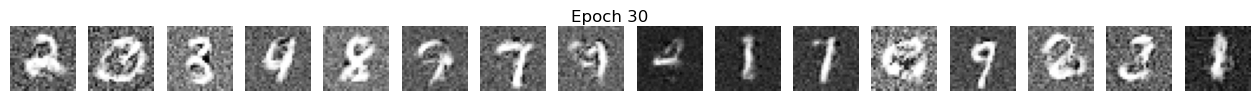

Epoch [31/50]  D Loss: 0.6988  G Loss: 1.8403
Epoch [32/50]  D Loss: 0.6361  G Loss: 2.5696
Epoch [33/50]  D Loss: 0.6197  G Loss: 2.5816
Epoch [34/50]  D Loss: 0.5658  G Loss: 2.1077
Epoch [35/50]  D Loss: 0.6229  G Loss: 2.3116
Epoch [36/50]  D Loss: 0.8184  G Loss: 2.1647
Epoch [37/50]  D Loss: 0.4853  G Loss: 1.8570
Epoch [38/50]  D Loss: 0.4736  G Loss: 2.7274
Epoch [39/50]  D Loss: 0.8200  G Loss: 2.5446
Epoch [40/50]  D Loss: 0.5319  G Loss: 1.8188


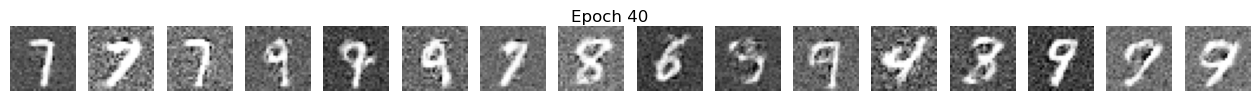

Epoch [41/50]  D Loss: 0.7920  G Loss: 1.8040
Epoch [42/50]  D Loss: 0.5419  G Loss: 2.6623
Epoch [43/50]  D Loss: 0.6315  G Loss: 1.7999
Epoch [44/50]  D Loss: 0.5889  G Loss: 2.3882
Epoch [45/50]  D Loss: 0.9314  G Loss: 2.1758
Epoch [46/50]  D Loss: 0.6150  G Loss: 1.6501
Epoch [47/50]  D Loss: 0.8193  G Loss: 2.4401
Epoch [48/50]  D Loss: 0.5389  G Loss: 1.9877
Epoch [49/50]  D Loss: 0.7073  G Loss: 1.7719
Epoch [50/50]  D Loss: 0.6846  G Loss: 2.1485


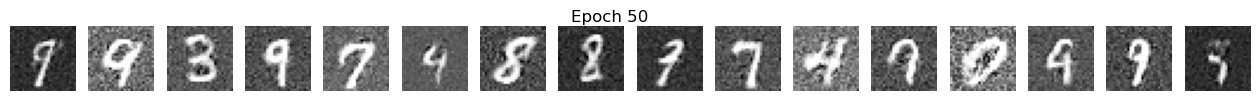

In [9]:
epochs = 200

for epoch in range(epochs):
    for real_imgs, _ in dataloader:
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # === Train Discriminator ===
        D.zero_grad()
        # Real
        real_labels = torch.ones((batch_size, 1), device=device)
        real_output = D(real_imgs)
        d_loss_real = criterion(real_output, real_labels)

        # Fake
        z = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = G(z)
        fake_labels = torch.zeros((batch_size, 1), device=device)
        fake_output = D(fake_imgs.detach())
        d_loss_fake = criterion(fake_output, fake_labels)

        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        opt_D.step()

        # === Train Generator ===
        G.zero_grad()
        z = torch.randn(batch_size, z_dim, device=device)
        fake_imgs = G(z)
        real_labels_for_G = torch.ones((batch_size, 1), device=device)  # want D(G(z)) = 1
        g_loss = criterion(D(fake_imgs), real_labels_for_G)
        g_loss.backward()
        opt_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    if (epoch + 1) % 10 == 0:
        show_generated(G, epoch + 1)


# 2. Check Model Collapse

In [22]:
class SimpleClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        return self.model(x)


In [23]:
classifier = SimpleClassifier().to(device)
optimizer = torch.optim.Adam(classifier.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Use same transform as GAN training
mnist_train = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)

# Train for a few epochs
classifier.train()
for epoch in range(5):
    total, correct = 0, 0
    for imgs, labels in train_loader:
        imgs, labels = imgs.to(device), labels.to(device)
        logits = classifier(imgs)
        loss = criterion(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        preds = logits.argmax(dim=1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    acc = correct / total
    print(f"Epoch {epoch+1} | Accuracy: {acc:.4f}")


Epoch 1 | Accuracy: 0.9178
Epoch 2 | Accuracy: 0.9644
Epoch 3 | Accuracy: 0.9761
Epoch 4 | Accuracy: 0.9818
Epoch 5 | Accuracy: 0.9860


In [24]:
def get_label_distribution(generator, classifier, z_dim=100, num_samples=1000):
    classifier.eval()
    generator.eval()
    preds = []

    with torch.no_grad():
        for _ in range(num_samples // 64):
            z = torch.randn(64, z_dim).to(device)
            gen_imgs = generator(z)
            logits = classifier(gen_imgs)
            labels = logits.argmax(dim=1)
            preds.extend(labels.cpu().numpy())

    return np.array(preds)


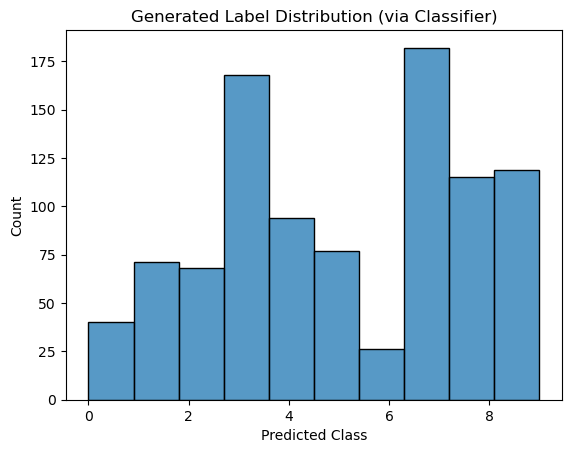

In [25]:
preds = get_label_distribution(G, classifier, z_dim=z_dim)
plot_label_distribution(preds, "Generated Label Distribution (via Classifier)")


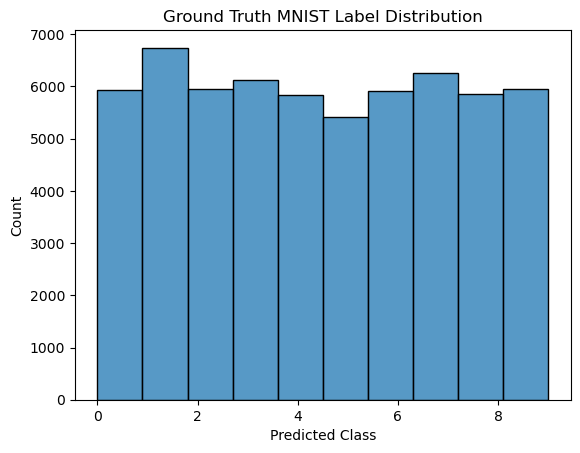

In [26]:
true_labels = mnist_train.targets.numpy()
plot_label_distribution(true_labels, "Ground Truth MNIST Label Distribution")


## WGAN-Implementation1 - Gradient Penalty

In [42]:
class Critic(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1)  # No Sigmoid
        )

    def forward(self, x):
        return self.model(x)

class Generator(nn.Module):
    def __init__(self, z_dim=100):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim, 128),
            nn.ReLU(True),
            nn.Linear(128, 256),
            nn.ReLU(True),
            nn.Linear(256, 28*28),
            nn.Tanh()
        )

    def forward(self, z):
        out = self.model(z)
        return out.view(z.size(0), 1, 28, 28)


In [43]:
def compute_gradient_penalty(critic, real_samples, fake_samples):
    batch_size = real_samples.size(0)
    epsilon = torch.rand(batch_size, 1, 1, 1, device=real_samples.device)
    interpolated = epsilon * real_samples + (1 - epsilon) * fake_samples
    interpolated.requires_grad_(True)

    scores = critic(interpolated)
    gradients = torch.autograd.grad(
        outputs=scores,
        inputs=interpolated,
        grad_outputs=torch.ones_like(scores),
        create_graph=True,
        retain_graph=True,
        only_inputs=True
    )[0]

    gradients = gradients.view(batch_size, -1)
    gradient_norm = gradients.norm(2, dim=1)
    penalty = ((gradient_norm - 1) ** 2).mean()
    return penalty


[1/50] Critic Loss: -1.6339 | Gen Loss: 1.5344
[2/50] Critic Loss: -1.5701 | Gen Loss: 0.2538
[3/50] Critic Loss: -1.3358 | Gen Loss: 0.4676
[4/50] Critic Loss: -1.4345 | Gen Loss: 0.4755
[5/50] Critic Loss: -1.7268 | Gen Loss: 0.5488
[6/50] Critic Loss: -1.3453 | Gen Loss: 0.5682
[7/50] Critic Loss: -1.3834 | Gen Loss: 0.3415
[8/50] Critic Loss: -1.4521 | Gen Loss: 0.4235
[9/50] Critic Loss: -1.5081 | Gen Loss: 0.3990
[10/50] Critic Loss: -1.8950 | Gen Loss: -0.0058


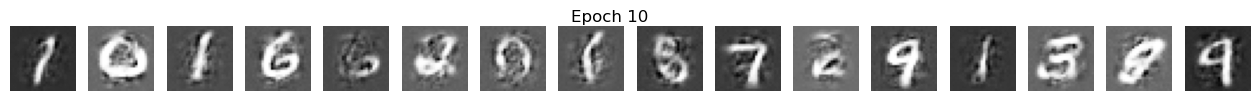

[11/50] Critic Loss: -1.3804 | Gen Loss: 1.1990
[12/50] Critic Loss: -1.5468 | Gen Loss: 0.1061
[13/50] Critic Loss: -1.2489 | Gen Loss: 0.3358
[14/50] Critic Loss: -1.6627 | Gen Loss: 0.0623
[15/50] Critic Loss: -1.5316 | Gen Loss: -0.1490
[16/50] Critic Loss: -1.7073 | Gen Loss: 0.2596
[17/50] Critic Loss: -1.6590 | Gen Loss: 0.2773
[18/50] Critic Loss: -1.1633 | Gen Loss: 0.0638
[19/50] Critic Loss: -1.3719 | Gen Loss: 0.3864
[20/50] Critic Loss: -1.1794 | Gen Loss: 0.6940


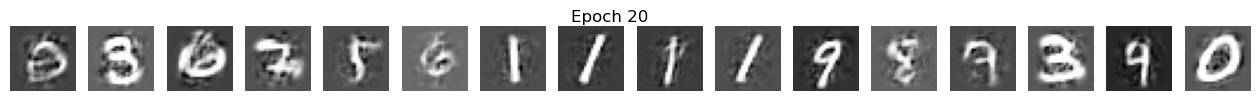

[21/50] Critic Loss: -1.3594 | Gen Loss: -0.1400
[22/50] Critic Loss: -1.4326 | Gen Loss: 0.0552
[23/50] Critic Loss: -1.3977 | Gen Loss: -0.4401
[24/50] Critic Loss: -1.2242 | Gen Loss: -0.5868
[25/50] Critic Loss: -1.5356 | Gen Loss: 0.3718
[26/50] Critic Loss: -1.3794 | Gen Loss: 0.2205
[27/50] Critic Loss: -1.1578 | Gen Loss: -0.4335
[28/50] Critic Loss: -1.3247 | Gen Loss: 0.1021
[29/50] Critic Loss: -1.2237 | Gen Loss: -0.0318
[30/50] Critic Loss: -1.3070 | Gen Loss: -0.1666


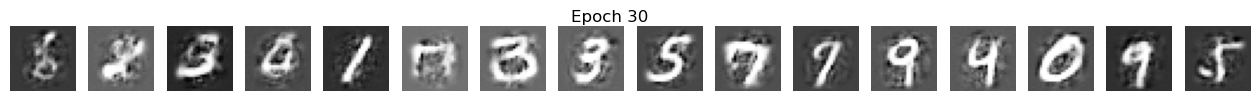

[31/50] Critic Loss: -1.1850 | Gen Loss: 0.0036
[32/50] Critic Loss: -1.2803 | Gen Loss: 0.4461
[33/50] Critic Loss: -1.3957 | Gen Loss: -0.2805
[34/50] Critic Loss: -1.3119 | Gen Loss: 0.2634
[35/50] Critic Loss: -1.2958 | Gen Loss: -0.0136
[36/50] Critic Loss: -1.5471 | Gen Loss: -0.1561
[37/50] Critic Loss: -1.0945 | Gen Loss: -0.5478
[38/50] Critic Loss: -1.1361 | Gen Loss: -0.1675
[39/50] Critic Loss: -1.2209 | Gen Loss: -0.0652
[40/50] Critic Loss: -1.2612 | Gen Loss: -0.0751


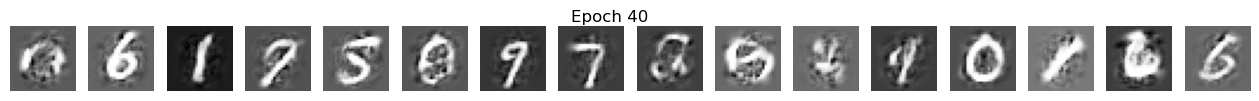

[41/50] Critic Loss: -1.3566 | Gen Loss: 0.2894
[42/50] Critic Loss: -1.3441 | Gen Loss: -0.2829
[43/50] Critic Loss: -1.3465 | Gen Loss: 0.3600
[44/50] Critic Loss: -1.2020 | Gen Loss: -0.2016
[45/50] Critic Loss: -1.0678 | Gen Loss: -0.2024
[46/50] Critic Loss: -1.4051 | Gen Loss: -0.1629
[47/50] Critic Loss: -1.1682 | Gen Loss: 0.3375
[48/50] Critic Loss: -1.1990 | Gen Loss: -0.2838
[49/50] Critic Loss: -1.0768 | Gen Loss: 0.2320
[50/50] Critic Loss: -1.3359 | Gen Loss: 0.0585


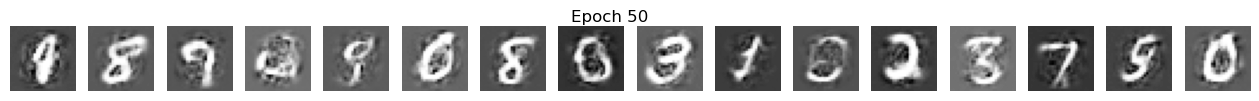

In [30]:
z_dim = 100
G = Generator(z_dim).to(device)
C = Critic().to(device)

opt_G = torch.optim.Adam(G.parameters(), lr=1e-4, betas=(0.0, 0.9))
opt_C = torch.optim.Adam(C.parameters(), lr=1e-4, betas=(0.0, 0.9))

lambda_gp = 10
n_critic = 5
epochs = 200

for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # === Train Critic ===
        for _ in range(n_critic):
            z = torch.randn(batch_size, z_dim, device=device)
            fake_imgs = G(z).detach()
            
            real_scores = C(real_imgs)
            fake_scores = C(fake_imgs)

            gp = compute_gradient_penalty(C, real_imgs, fake_imgs)
            loss_C = -(real_scores.mean() - fake_scores.mean()) + lambda_gp * gp

            opt_C.zero_grad()
            loss_C.backward()
            opt_C.step()

        # === Train Generator ===
        z = torch.randn(batch_size, z_dim, device=device)
        gen_imgs = G(z)
        loss_G = -C(gen_imgs).mean()

        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"[{epoch+1}/{epochs}] Critic Loss: {loss_C.item():.4f} | Gen Loss: {loss_G.item():.4f}")

    if (epoch + 1) % 10 == 0:
        show_generated(G, epoch + 1)


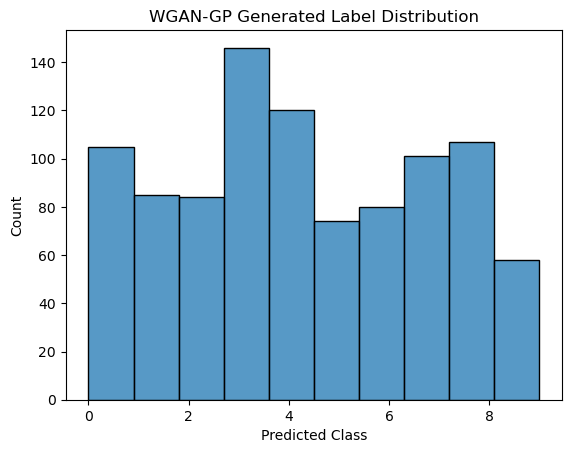

In [31]:
preds_gp = get_label_distribution(G, classifier, z_dim=z_dim)
plot_label_distribution(preds_gp, "WGAN-GP Generated Label Distribution")


### We can see from the classifier distribution of the generated images, they become more even.

## 3. WGAN-Implementation2 - Gradient Clipping

In [ ]:
G = Generator(z_dim).to(device)
C = Critic().to(device)

opt_G = torch.optim.RMSprop(G.parameters(), lr=0.00005)
opt_C = torch.optim.RMSprop(C.parameters(), lr=0.00005)

clip_value = 0.01
n_critic = 5
epochs = 200

for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # === Train Critic ===
        for _ in range(n_critic):
            C.zero_grad()

            # Real samples
            real_scores = C(real_imgs)
            # Fake samples
            z = torch.randn(batch_size, z_dim).to(device)
            fake_imgs = G(z)
            fake_scores = C(fake_imgs.detach())

            # Wasserstein loss: maximize real - fake
            loss_C = -(real_scores.mean() - fake_scores.mean())
            loss_C.backward()
            opt_C.step()

            # Weight clipping for Lipschitz constraint
            for p in C.parameters():
                p.data.clamp_(-clip_value, clip_value)

        # === Train Generator ===
        G.zero_grad()
        z = torch.randn(batch_size, z_dim).to(device)
        gen_imgs = G(z)
        # Maximize the critic’s score on fakes
        loss_G = -C(gen_imgs).mean()
        loss_G.backward()
        opt_G.step()

    print(f"[{epoch+1}/{epochs}] Critic Loss: {loss_C.item():.4f} | Gen Loss: {loss_G.item():.4f}")

    if (epoch+1) % 10 == 0:
        show_generated(G, epoch+1)


## 4. Conditional GAN

In [32]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# 1. Prepare dataset and DataLoader
batch_size = 128

# Transformation: convert to tensor and normalize to [-1, 1]
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load MNIST training dataset
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# 2. Set up device for GPU usage if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Using device: cuda


In [35]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100, n_classes=10, embed_dim=50, img_size=28):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.img_size = img_size
        # Embedding for labels
        self.label_embed = nn.Embedding(n_classes, embed_dim)
        # Network layers: We'll define a simple MLP
        input_dim = latent_dim + embed_dim  # total input size after concatenating noise and label embed
        
        # Define a sequential model for the generator
        self.model = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(256, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(1024, img_size*img_size),  # output layer (28*28 pixels)
            nn.Tanh()  # output in [-1, 1]
        )
        
    def forward(self, noise, labels):
        # Get label embedding and flatten it
        embedded_labels = self.label_embed(labels)   # shape: (batch_size, embed_dim)
        # Concatenate noise and label embedding
        gen_input = torch.cat((noise, embedded_labels), dim=1)  # shape: (batch_size, latent_dim+embed_dim)
        img_flat = self.model(gen_input)  # generate flattened image
        # Reshape to image shape (batch_size, 1, 28, 28)
        img = img_flat.view(img_flat.size(0), 1, self.img_size, self.img_size)
        return img

# Instantiate the generator and move to device
latent_dim = 100  # dimension of noise vector
gen = Generator(latent_dim=latent_dim).to(device)
print(gen)

Generator(
  (label_embed): Embedding(10, 50)
  (model): Sequential(
    (0): Linear(in_features=150, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Linear(in_features=256, out_features=512, bias=True)
    (4): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.2, inplace=True)
    (6): Linear(in_features=512, out_features=1024, bias=True)
    (7): BatchNorm1d(1024, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.2, inplace=True)
    (9): Linear(in_features=1024, out_features=784, bias=True)
    (10): Tanh()
  )
)


In [37]:
class Discriminator(nn.Module):
    def __init__(self, n_classes=10, embed_dim=50, img_size=28):
        super(Discriminator, self).__init__()
        self.img_size = img_size
        # Embedding for labels
        self.label_embed = nn.Embedding(n_classes, embed_dim)
        # Define the sequential model for discriminator
        # Input dimension = image pixels + label embed dimension
        input_dim = img_size*img_size + embed_dim  # 784 + 50
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.4),
            
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.4),
            
            nn.Linear(256, 64),
            nn.LeakyReLU(0.2, inplace=True),
            
            nn.Linear(64, 1),
            nn.Sigmoid()  # output probability (real/fake)
        )
        
    def forward(self, img, labels):
        # Flatten the image
        img_flat = img.view(img.size(0), -1)  # shape: (batch_size, 784)
        # Embed the labels
        embedded_labels = self.label_embed(labels)  # shape: (batch_size, embed_dim)
        # Concatenate image and label
        d_in = torch.cat((img_flat, embedded_labels), dim=1)  # shape: (batch_size, 784+embed_dim)
        validity = self.model(d_in)  # shape: (batch_size, 1) - discriminator output
        return validity

# Instantiate discriminator and move to device
disc = Discriminator().to(device)
print(disc)


Discriminator(
  (label_embed): Embedding(10, 50)
  (model): Sequential(
    (0): Linear(in_features=834, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Dropout(p=0.4, inplace=False)
    (6): Linear(in_features=256, out_features=64, bias=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Linear(in_features=64, out_features=1, bias=True)
    (9): Sigmoid()
  )
)


In [38]:
import torch.optim as optim

# Loss function
adversarial_loss = nn.BCELoss()

# Optimizers for generator and discriminator
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
optimizer_G = optim.Adam(gen.parameters(), lr=lr, betas=(beta1, beta2))
optimizer_D = optim.Adam(disc.parameters(), lr=lr, betas=(beta1, beta2))

# Fixed noise & labels for monitoring generator progress
fixed_noise = torch.randn(10, latent_dim, device=device)          # 10 random vectors
fixed_labels = torch.tensor([0,1,2,3,4,5,6,7,8,9], device=device)  # one of each digit


Epoch [1/500]  D_loss: 0.9063  G_loss: 1.3741


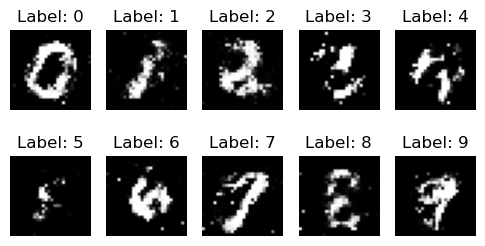

Epoch [2/500]  D_loss: 0.8413  G_loss: 1.5794


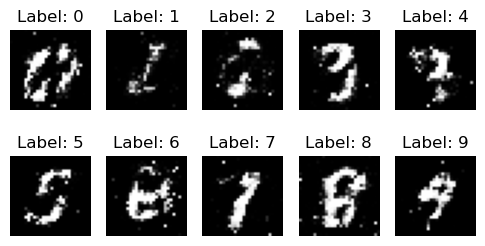

Epoch [3/500]  D_loss: 1.0331  G_loss: 1.2711


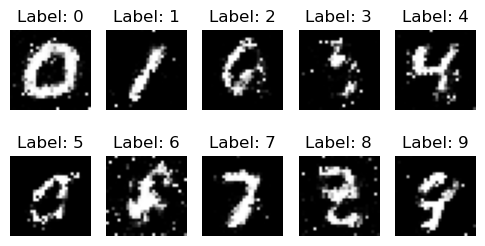

Epoch [4/500]  D_loss: 1.0679  G_loss: 1.1821


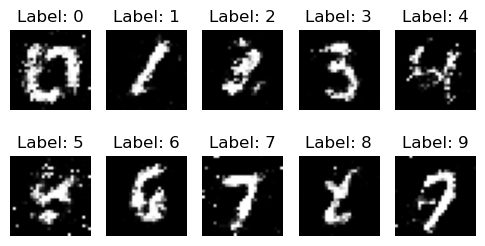

Epoch [5/500]  D_loss: 1.2326  G_loss: 1.0820


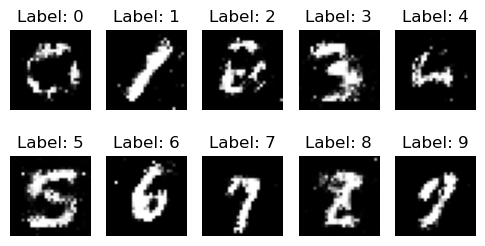

Epoch [6/500]  D_loss: 1.1898  G_loss: 1.2186


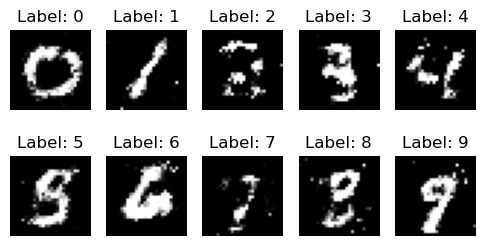

Epoch [7/500]  D_loss: 1.1320  G_loss: 1.1891


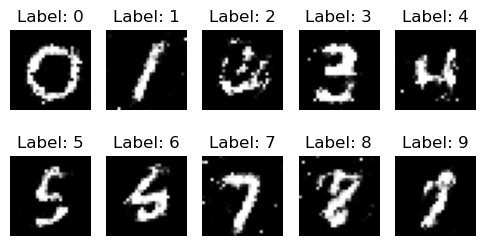

Epoch [8/500]  D_loss: 1.1069  G_loss: 1.1329


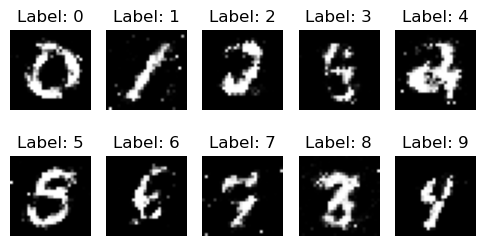

Epoch [9/500]  D_loss: 1.2101  G_loss: 0.8809


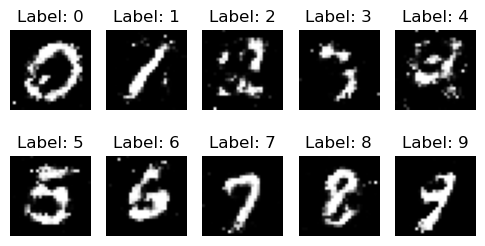

Epoch [10/500]  D_loss: 1.1554  G_loss: 0.8545


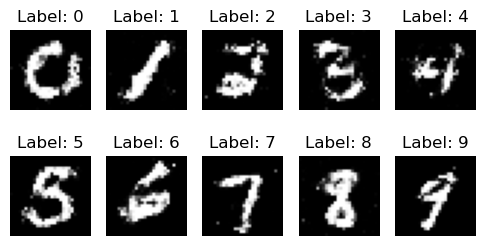

Epoch [11/500]  D_loss: 1.2339  G_loss: 0.8817


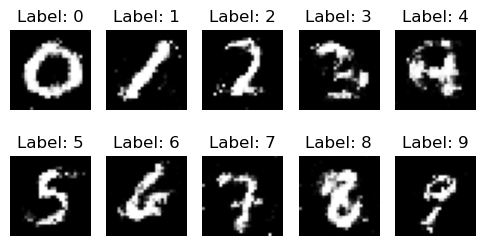

Epoch [12/500]  D_loss: 1.2672  G_loss: 0.8599


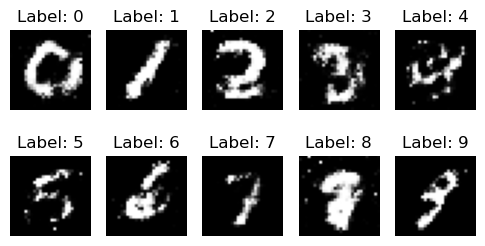

Epoch [13/500]  D_loss: 1.3487  G_loss: 0.8342


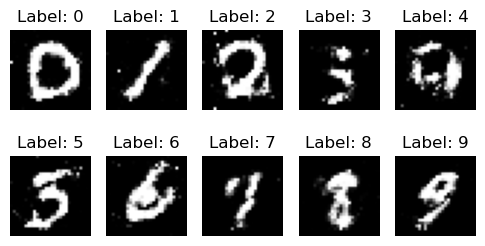

Epoch [14/500]  D_loss: 1.2980  G_loss: 0.8897


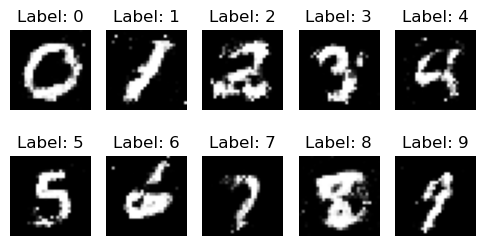

Epoch [15/500]  D_loss: 1.3480  G_loss: 0.8462


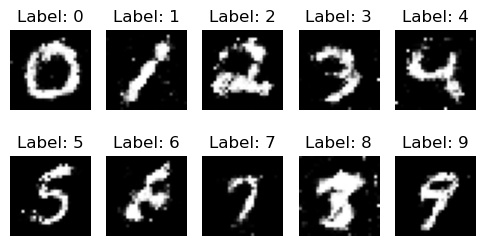

Epoch [16/500]  D_loss: 1.3432  G_loss: 0.7477


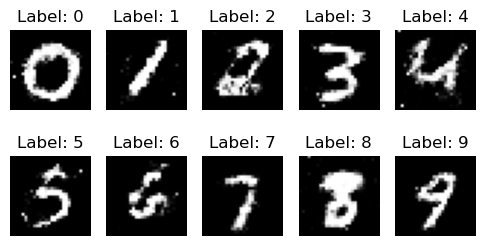

Epoch [17/500]  D_loss: 1.3339  G_loss: 0.8054


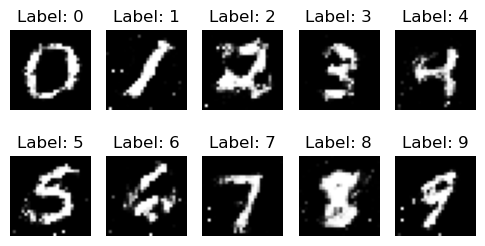

Epoch [18/500]  D_loss: 1.3650  G_loss: 0.7543


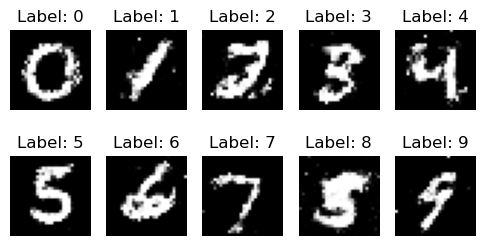

Epoch [19/500]  D_loss: 1.3510  G_loss: 0.8455


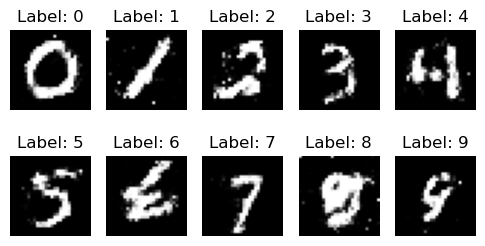

Epoch [20/500]  D_loss: 1.3564  G_loss: 0.7038


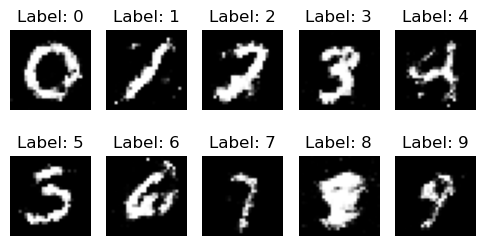

Epoch [21/500]  D_loss: 1.3036  G_loss: 0.7397


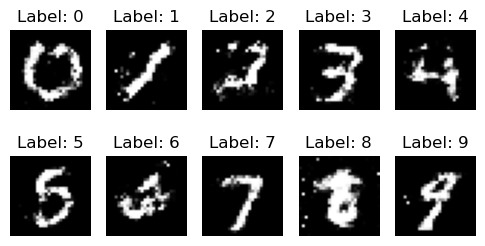

Epoch [22/500]  D_loss: 1.3025  G_loss: 0.7364


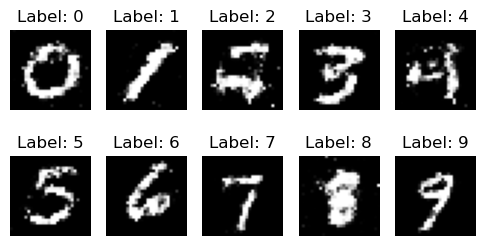

Epoch [23/500]  D_loss: 1.2974  G_loss: 0.8250


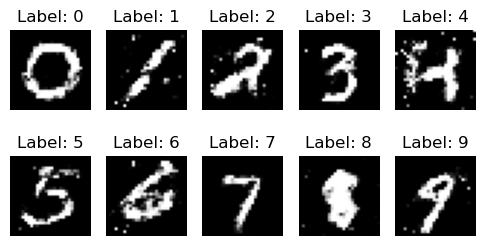

Epoch [24/500]  D_loss: 1.3510  G_loss: 0.8100


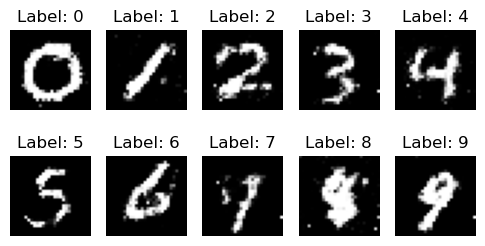

Epoch [25/500]  D_loss: 1.3143  G_loss: 0.7244


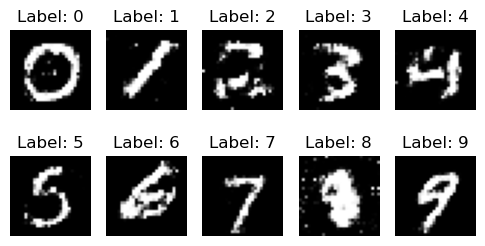

Epoch [26/500]  D_loss: 1.3815  G_loss: 0.8083


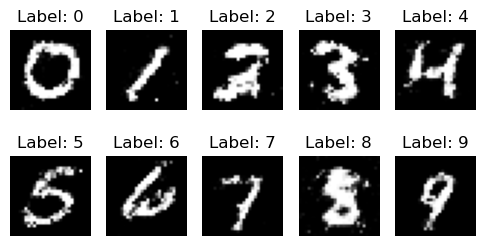

Epoch [27/500]  D_loss: 1.3276  G_loss: 0.7534


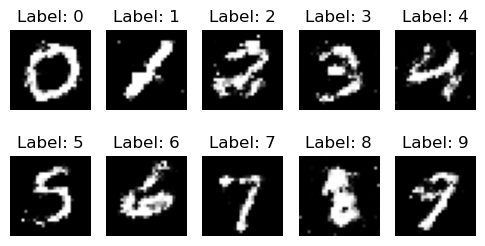

Epoch [28/500]  D_loss: 1.3709  G_loss: 0.8385


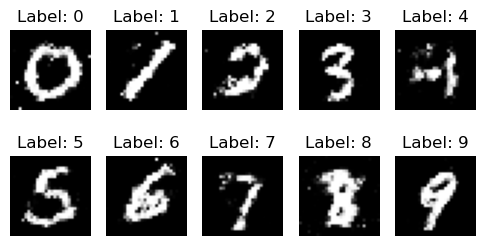

Epoch [29/500]  D_loss: 1.3384  G_loss: 0.7485


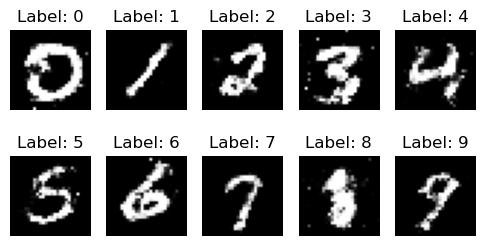

Epoch [30/500]  D_loss: 1.3920  G_loss: 0.7803


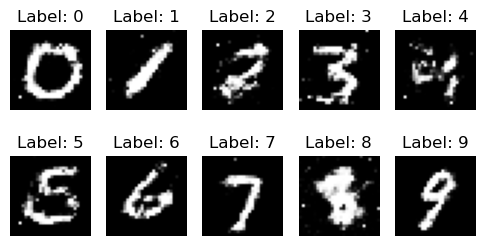

Epoch [31/500]  D_loss: 1.3512  G_loss: 0.7500


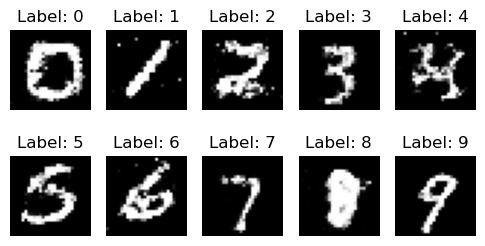

Epoch [32/500]  D_loss: 1.3236  G_loss: 0.7814


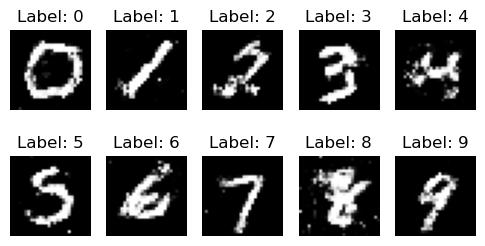

Epoch [33/500]  D_loss: 1.3836  G_loss: 0.7485


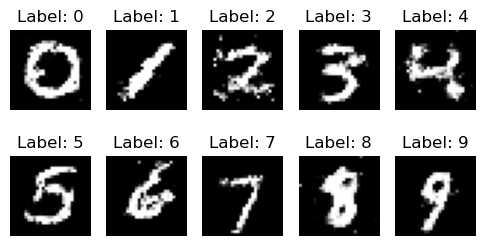

Epoch [34/500]  D_loss: 1.3657  G_loss: 0.7650


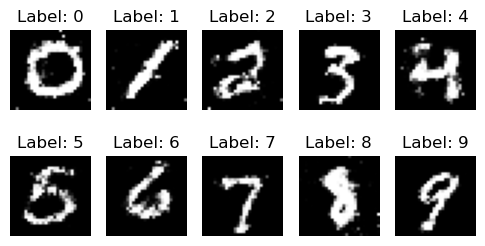

Epoch [35/500]  D_loss: 1.3499  G_loss: 0.7703


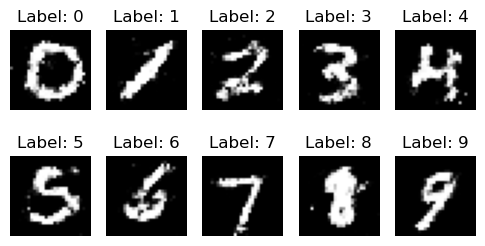

Epoch [36/500]  D_loss: 1.3840  G_loss: 0.7558


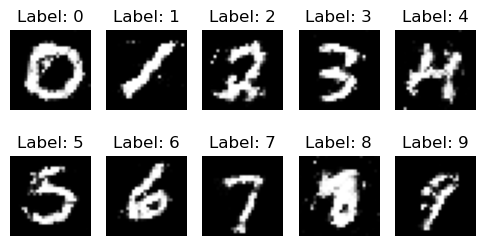

Epoch [37/500]  D_loss: 1.3625  G_loss: 0.7763


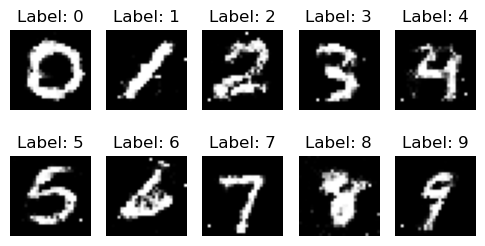

Epoch [38/500]  D_loss: 1.3553  G_loss: 0.7234


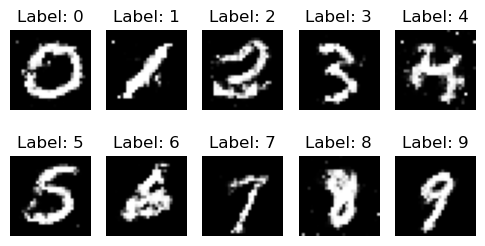

Epoch [39/500]  D_loss: 1.3677  G_loss: 0.7993


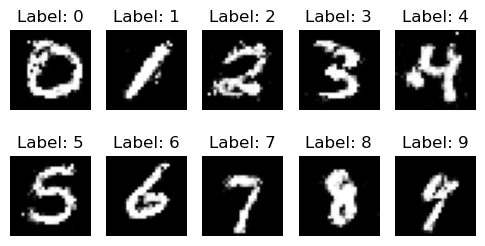

Epoch [40/500]  D_loss: 1.3698  G_loss: 0.7882


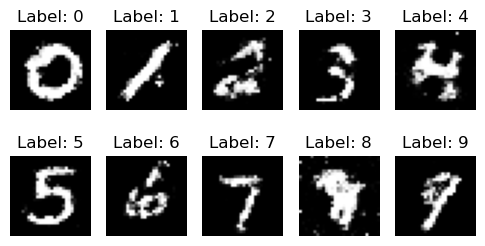

Epoch [41/500]  D_loss: 1.3659  G_loss: 0.6954


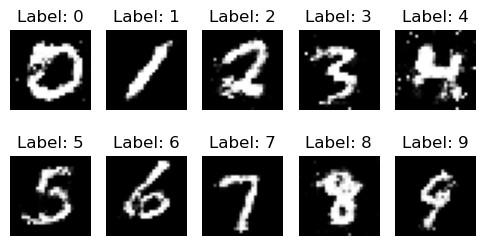

Epoch [42/500]  D_loss: 1.3658  G_loss: 0.7312


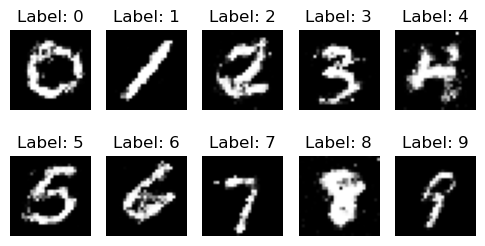

Epoch [43/500]  D_loss: 1.3458  G_loss: 0.7186


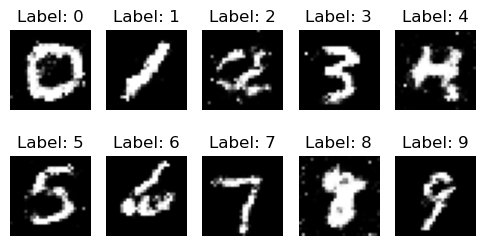

Epoch [44/500]  D_loss: 1.3549  G_loss: 0.7217


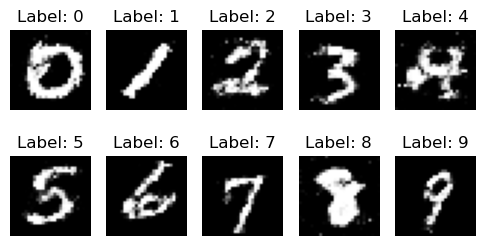

Epoch [45/500]  D_loss: 1.3220  G_loss: 0.7047


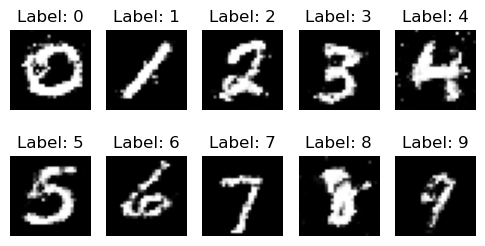

Epoch [46/500]  D_loss: 1.3794  G_loss: 0.7527


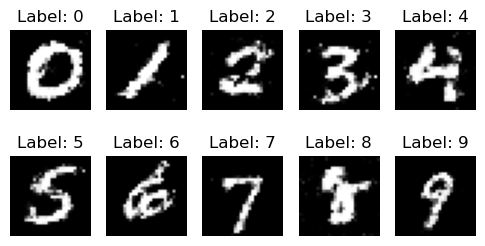

Epoch [47/500]  D_loss: 1.3341  G_loss: 0.7403


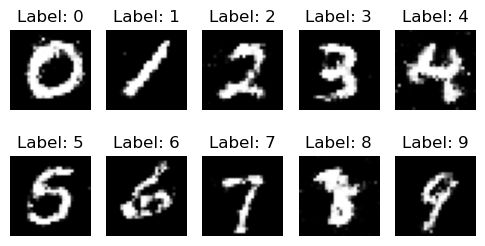

Epoch [48/500]  D_loss: 1.3753  G_loss: 0.7421


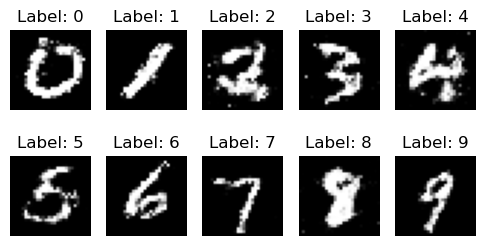

Epoch [49/500]  D_loss: 1.3724  G_loss: 0.7429


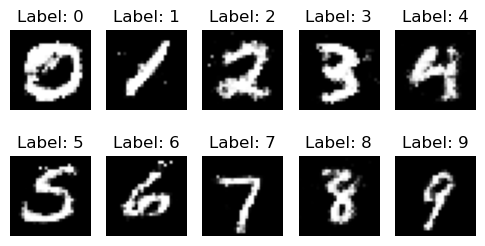

Epoch [50/500]  D_loss: 1.3529  G_loss: 0.7208


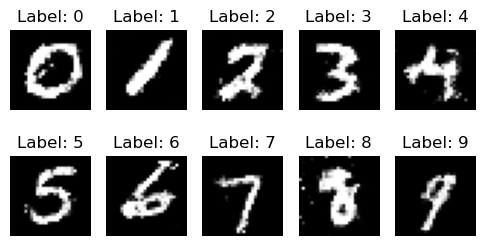

Epoch [51/500]  D_loss: 1.3741  G_loss: 0.7098


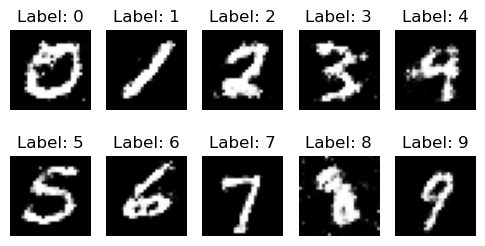

Epoch [52/500]  D_loss: 1.3275  G_loss: 0.7044


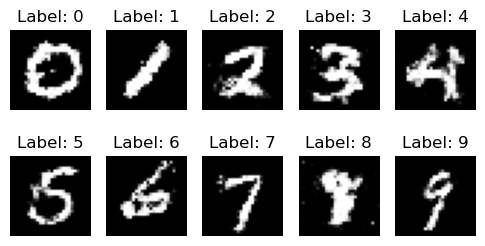

Epoch [53/500]  D_loss: 1.3952  G_loss: 0.7140


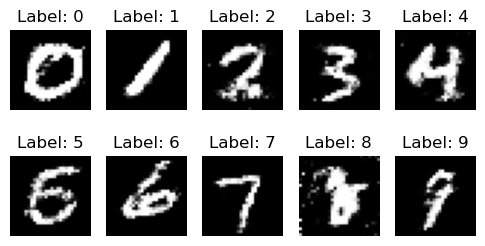

Epoch [54/500]  D_loss: 1.3803  G_loss: 0.7233


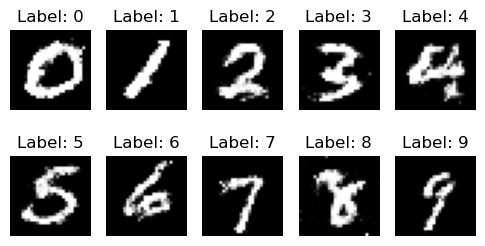

Epoch [55/500]  D_loss: 1.3217  G_loss: 0.7246


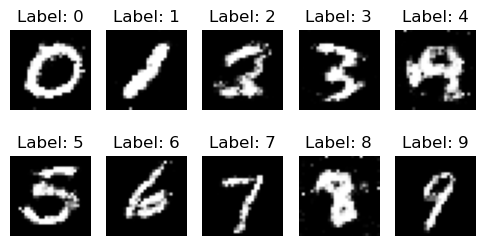

Epoch [56/500]  D_loss: 1.3673  G_loss: 0.7168


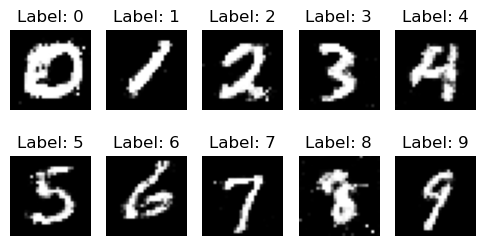

Epoch [57/500]  D_loss: 1.3973  G_loss: 0.7520


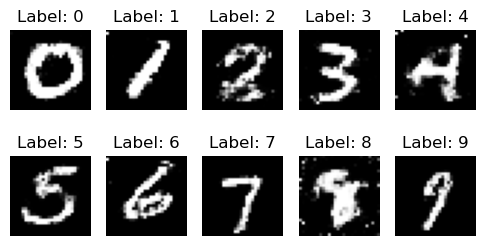

Epoch [58/500]  D_loss: 1.3845  G_loss: 0.7152


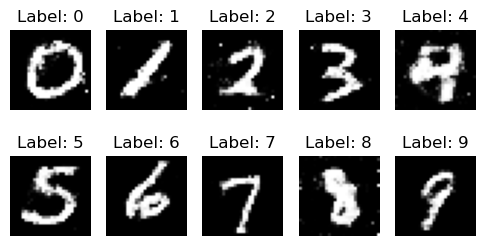

Epoch [59/500]  D_loss: 1.3746  G_loss: 0.7240


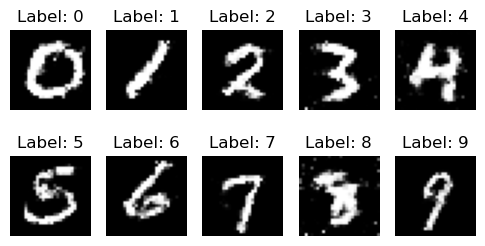

Epoch [60/500]  D_loss: 1.3245  G_loss: 0.7276


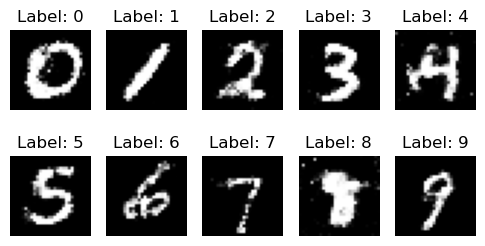

Epoch [61/500]  D_loss: 1.3957  G_loss: 0.7630


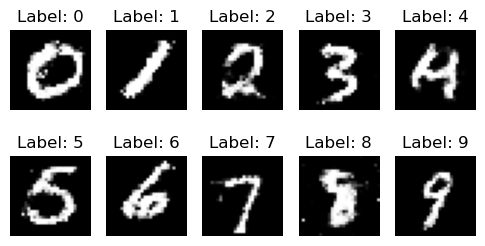

Epoch [62/500]  D_loss: 1.3688  G_loss: 0.7313


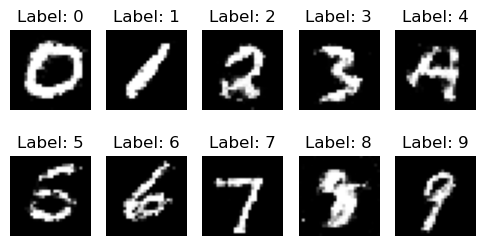

Epoch [63/500]  D_loss: 1.3547  G_loss: 0.7337


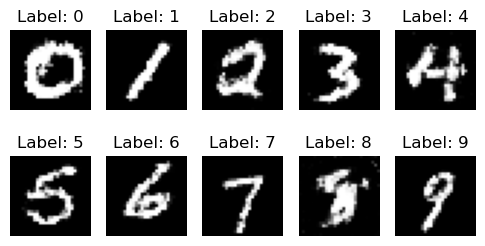

Epoch [64/500]  D_loss: 1.3661  G_loss: 0.7433


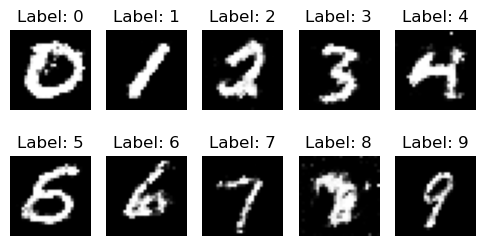

Epoch [65/500]  D_loss: 1.3639  G_loss: 0.7319


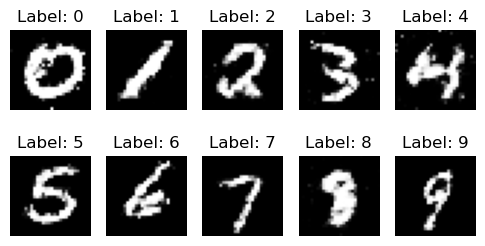

KeyboardInterrupt: 

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Training hyperparameters
num_epochs = 500

# Arrays to keep track of loss for plotting
g_losses = []
d_losses = []

for epoch in range(1, num_epochs+1):
    gen.train()  # set generator to training mode (in case of BatchNorm, Dropout)
    disc.train() # set discriminator to training mode
    
    for batch_idx, (real_imgs, real_labels) in enumerate(train_loader):
        batch_size_curr = real_imgs.size(0)
        real_imgs = real_imgs.to(device)
        real_labels = real_labels.to(device)
        
        # REAL and FAKE labels for discriminator
        valid = torch.ones(batch_size_curr, 1, device=device)  # label 1
        fake = torch.zeros(batch_size_curr, 1, device=device)  # label 0
        
        # --------------------
        # Train Discriminator
        # --------------------
        optimizer_D.zero_grad()
        # Loss on real images:
        output_real = disc(real_imgs, real_labels)        # D(real_img, label)
        d_loss_real = adversarial_loss(output_real, valid)  # want D(real)=1
        
        # Loss on fake images:
        # Generate fake images from random noise and labels
        z = torch.randn(batch_size_curr, latent_dim, device=device)
        random_labels = torch.randint(0, 10, (batch_size_curr,), device=device)
        fake_imgs = gen(z, random_labels)
        output_fake = disc(fake_imgs.detach(), random_labels)  # D(fake_img, label)
        d_loss_fake = adversarial_loss(output_fake, fake)      # want D(fake)=0
        
        # Total D loss and update
        d_loss = d_loss_real + d_loss_fake
        d_loss.backward()
        optimizer_D.step()
        
        # ----------------
        # Train Generator
        # ----------------
        optimizer_G.zero_grad()
        # Generate a new batch of fake images (with labels)
        z = torch.randn(batch_size_curr, latent_dim, device=device)
        gen_labels = torch.randint(0, 10, (batch_size_curr,), device=device)
        gen_imgs = gen(z, gen_labels)
        # Get discriminator's opinion on these fakes
        output = disc(gen_imgs, gen_labels)
        # We train G to fool D: so we use 'valid' (1) as target for these fakes
        g_loss = adversarial_loss(output, valid)
        g_loss.backward()
        optimizer_G.step()
        
        # Record losses (take mean of batch losses for tracking if needed)
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())
    
    # End of epoch: print losses and generate sample images
    print(f"Epoch [{epoch}/{num_epochs}]  D_loss: {d_loss.item():.4f}  G_loss: {g_loss.item():.4f}")
    
    # Switch to eval mode for generator (for consistent batchnorm if any)
    gen.eval()
    # Generate samples for visualization
    sample_imgs = gen(fixed_noise, fixed_labels).detach().cpu()
    # Rescale images from [-1,1] to [0,1] for display
    sample_imgs = (sample_imgs * 0.5) + 0.5
    # Plot the generated images in a 2-row grid (digits 0-9)
    fig, axes = plt.subplots(2, 5, figsize=(6,3))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(sample_imgs[i].squeeze(0), cmap='gray')
        ax.set_title(f"Label: {fixed_labels[i].item()}")
        ax.axis('off')
    plt.show()
